In [1]:
#2020Noc02 Josi
#
#MouseObject including Wheeler
#@assays$RNA@counts and @meta.data only
#Translation of Gene Names
#scRNA-seq


In [2]:
#for scRNA-seq objects
library(Seurat)
library(dplyr)

#for visualization|
library(cowplot)
library(ggplot2)
library(patchwork)

#for translation
library(biomaRt)

#organizingt sparse matrix
library(Matrix)

In [3]:
Mouse<- readRDS("/media/reuschenbach/Data/Masterthesis/Merged/MouseCtrl/2020_scRNA_mouse_HealthyOligo_SCT_UMAPembedded_updated.rds")

In [5]:
# Gene name list for tranlation was taken from:
# http://www.informatics.jax.org/downloads/reports/HOM_MouseHumanSequence.rpt; 28.10.2020
GeneTrans<-read.table("/home/reuschenbach/Downloads/GeneTranslation/GeneListHvsM.csv",sep=",", header=TRUE)
GeneTrans

HomoloGeneID_Human OrganismHuman SymbolHuman HomoloGeneID_Mouse
1      3                 human         ACADM        3                
2      5                 human         ACADVL       5                
3      6                 human         ACAT1        6                
4      7                 human         ACVR1        7                
5      9                 human         SGCA         9                
6     12                 human         ADSL        12                
7     13                 human         AGA         13                
8     14                 human         AGT         14                
9     16                 human         ALAD        16                
10    17                 human         ALAS2       17                
11    20                 human         AMPD1       20                
12    26                 human         APOH        26                
13    27                 human         FAS         27                
14    28                 human         AR          28                
15    29                 human         ARG1        29                
16    32                 human         ASL         32                
17    33                 human         ASPA        33                
18    35                 human         ATP7A       35                
19    39                 human         BCKDHB      39                
20    41                 human         BRCA2       41                
21    44                 human         SERPING1    44                
22    45                 human         C2          45                
23    47                 human         C6          47                
24    48                 human         C8B         48                
25    52                 human         CAPN3       52                
26    55                 human         CD3G        55                
27    56                 human         CD40LG      56                
28    59                 human         CHRNA1      59                
29    60                 human         CHRNE       60                
30    61                 human         LYST        61                
...   ...                ...           ...         ...               
20875 NA                                           141195            
20876 NA                                           141195            
20877 NA                                           141195            
20878 NA                                           141196            
20879 NA                                           141197            
20880 NA                                           141197            
20881 NA                                           141199            
20882 NA                                           141200            
20883 NA                                           141200            
20884 NA                                           141200            
20885 NA                                           141202            
20886 NA                                           141202            
20887 NA                                           141203            
20888 NA                                           141203            
20889 NA                                           141204            
20890 NA                                           141205            
20891 NA                                           141205            
20892 NA                                           141207            
20893 NA                                           141208            
20894 NA                                           141209            
20895 NA                                           141210            
20896 NA                                           141210            
20897 NA                                           141212            
20898 NA                                           141212            
20899 NA                                           141212            
20900 NA        

In [6]:
#only use RNA assay and counts to reduce translation mistakes
Mouse<-(CreateSeuratObject(counts = Mouse@assays$RNA@counts ,meta.data = Mouse@meta.data))

In [7]:
#use single slots for following translation
m<- Mouse@assays$RNA@counts@Dimnames[[1]]
length(m)
head(m)


[1] 49257

[1] "Xkr4"   "Rp1"    "Sox17"  "Mrpl15" "Lypla1" "Tcea1"

In [8]:
#first translation which produces duplicates
mNew<-c()
for (i in m){
    #find position of mouse gene symbol in translation list
    m_pos <- match(i, GeneTrans$SymbolMouse)
    #call respectice mouse homologene ID in same row
    m_id <- GeneTrans$HomoloGeneID_Mouse[m_pos]
    #find position of respectice human homolegen ID
    h_pos<-match(m_id, GeneTrans$HomoloGeneID_Human)
    #if gene symbol/ human homolegen ID cannot be found use original name
    if (is.na(m_pos)){
        print(i)
    mNew = c(mNew, i)}
    else if (is.na(h_pos)){
        print(i)
    mNew=c(mNew, i)}
    else{
        h_gene <- GeneTrans$SymbolHuman[h_pos]
        h_gene <- as.character(h_gene)
        print(h_gene)
    mNew=c(mNew, h_gene)}
}


[1] "XKR4"
[1] "RP1"
[1] "SOX17"
[1] "MRPL15"
[1] "LYPLA1"
[1] "TCEA1"
[1] "RGS20"
[1] "ATP6V1H"
[1] "OPRK1"
[1] "NPBWR1"
[1] "RB1CC1"
[1] "Fam150a"
[1] "ST18"
[1] "PCMTD1"
[1] "SNTG1"
[1] "RRS1"
[1] "ADHFE1"
[1] "2610203C22Rik"
[1] "3110035E14Rik"
[1] "MYBL1"
[1] "VCPIP1"
[1] "1700034P13Rik"
[1] "C8orf44-SGK3"
[1] "MCMDC2"
[1] "Snhg6"
[1] "Snord87"
[1] "PPP1R42"
[1] "COPS5"
[1] "CSPP1"
[1] "ARFGEF1"
[1] "CPA6"
[1] "PREX2"
[1] "C8orf34"
[1] "Gm17644"
[1] "SULF1"
[1] "SLCO5A1"
[1] "PRDM14"
[1] "NCOA2"
[1] "TRAM1"
[1] "LACTB2"
[1] "XKR9"
[1] "Gm5523"
[1] "EYA1"
[1] "MSC"
[1] "TRPA1"
[1] "KCNB2"
[1] "TERF1"
[1] "SBSPON"
[1] "C8orf89"
[1] "RPL7"
[1] "RDH10"
[1] "STAU2"
[1] "UBE2W"
[1] "Tceb1"
[1] "D030040B21Rik"
[1] "TMEM70"
[1] "LY96"
[1] "JPH1"
[1] "GDAP1"
[1] "PI15"
[1] "CRISPLD1"
[1] "CRISP1"
[1] "Defb44-ps"
[1] "DEFB113"
[1] "Defb41"
[1] "TFAP2D"
[1] "TFAP2B"
[1] "PKHD1"
[1] "4930486I03Rik"
[1] "Mir206"
[1] "Mir133b"
[1] "IL17A"
[1] "IL17F"
[1] "MCM3"
[1] "6720483E21Rik"
[1] "PAQR8"
[

In [11]:
##List of Gene names which are double or cannot be translated
dup <- c()
for (i in which(duplicated(mNew))){
    print(mNew[[i]])
    dup<- c(dup, mNew[[i]])
}


[1] "KHDC1L"
[1] "KHDC1L"
[1] "DNAH7"
[1] "UGT1A10"
[1] "UGT1A6"
[1] "IFI16"
[1] "IFI16"
[1] "IFI16"
[1] "TAAR8"
[1] "TAAR8"
[1] "AMD1"
[1] "KRTAP12-2"
[1] "KRTAP12-2"
[1] "KRTAP10-7"
[1] "KRTAP10-7"
[1] "KRTAP10-7"
[1] "KRTAP10-7"
[1] "KRTAP10-7"
[1] "KRTAP10-7"
[1] "KRTAP10-7"
[1] "LYZ"
[1] "IL22"
[1] "RDH16"
[1] "RDH16"
[1] "RDH16"
[1] "OR2AP1"
[1] "OR6C76"
[1] "OR6C6"
[1] "OR9K2"
[1] "OR2Y1"
[1] "OR2T4"
[1] "OR2T4"
[1] "OR2T4"
[1] "OR2T4"
[1] "OR2AK2"
[1] "OR2AK2"
[1] "CLEC10A"
[1] "ZNF658"
[1] "OR1A1"
[1] "SLFN13"
[1] "SLFN12L"
[1] "OR4D2"
[1] "KRTAP3-3"
[1] "KRTAP2-3"
[1] "KRTAP4-9"
[1] "KRTAP4-9"
[1] "KRTAP4-9"
[1] "KRTAP4-9"
[1] "KRTAP4-9"
[1] "KRT31"
[1] "KRT31"
[1] "H3-3A"
[1] "SERPINA1"
[1] "SERPINA1"
[1] "SERPINA1"
[1] "SERPINA1"
[1] "SERPINA3"
[1] "SERPINA3"
[1] "SERPINA3"
[1] "OR4L1"
[1] "OR11H4"
[1] "PNP"
[1] "OR10G2"
[1] "GZMH"
[1] "GZMH"
[1] "GZMH"
[1] "PHF11"
[1] "PHF11"
[1] "PHF11"
[1] "UGT3A1"
[1] "GSDMC"
[1] "GSDMC"
[1] "GSDMC"
[1] "CSF2RB"
[1] "OR10AD1"
[1] "KRT6B

In [12]:
length(dup)
head(dup)

[1] 378

[1] "KHDC1L"  "KHDC1L"  "DNAH7"   "UGT1A10" "UGT1A6"  "IFI16"

In [21]:
write.csv(dup, "/media/reuschenbach/Data/Masterthesis/Merged/MouseCtrl/GeneTranslationMouseHuman_DoubleGeneNames.csv" )

In [13]:
#Produce list of translated and untranslated genes due to following reasons: 
#Untranslated Lists: Gene not in table, No humamn homolgy; Translation leads to duplicate
Translated = c()
NotInTable = c()
NoHumanHom = c()
Duplicated = c()
for (i in m){
    m_pos <- match(i, GeneTrans$SymbolMouse)
    m_id <- GeneTrans$HomoloGeneID_Mouse[m_pos]
    h_pos<-match(m_id, GeneTrans$HomoloGeneID_Human)
    h_gene<-GeneTrans$SymbolHuman[h_pos]
    h_gene <- as.character(h_gene)
    nodup<-match(h_gene, dup)
    if (is.na(m_pos)){
        print(i)
    NotInTable=c(NotInTable, i)}
    else if (is.na(h_pos)){
        print(i)
    NoHumanHom=c(NoHumanHom, i)}
    else if (is.na(nodup)){
        print(h_gene)
        Translated=c(Translated, h_gene)}
    else{print(i)
         Duplicated=c(Duplicated, i)}
}


[1] "XKR4"
[1] "RP1"
[1] "SOX17"
[1] "MRPL15"
[1] "LYPLA1"
[1] "TCEA1"
[1] "RGS20"
[1] "ATP6V1H"
[1] "OPRK1"
[1] "NPBWR1"
[1] "RB1CC1"
[1] "Fam150a"
[1] "ST18"
[1] "PCMTD1"
[1] "SNTG1"
[1] "RRS1"
[1] "ADHFE1"
[1] "2610203C22Rik"
[1] "3110035E14Rik"
[1] "MYBL1"
[1] "VCPIP1"
[1] "1700034P13Rik"
[1] "C8orf44-SGK3"
[1] "MCMDC2"
[1] "Snhg6"
[1] "Snord87"
[1] "PPP1R42"
[1] "COPS5"
[1] "CSPP1"
[1] "ARFGEF1"
[1] "CPA6"
[1] "PREX2"
[1] "C8orf34"
[1] "Gm17644"
[1] "SULF1"
[1] "SLCO5A1"
[1] "PRDM14"
[1] "NCOA2"
[1] "TRAM1"
[1] "LACTB2"
[1] "XKR9"
[1] "Gm5523"
[1] "EYA1"
[1] "MSC"
[1] "TRPA1"
[1] "KCNB2"
[1] "TERF1"
[1] "SBSPON"
[1] "C8orf89"
[1] "RPL7"
[1] "RDH10"
[1] "STAU2"
[1] "UBE2W"
[1] "Tceb1"
[1] "D030040B21Rik"
[1] "TMEM70"
[1] "LY96"
[1] "JPH1"
[1] "GDAP1"
[1] "PI15"
[1] "CRISPLD1"
[1] "CRISP1"
[1] "Defb44-ps"
[1] "DEFB113"
[1] "Defb41"
[1] "TFAP2D"
[1] "TFAP2B"
[1] "PKHD1"
[1] "4930486I03Rik"
[1] "Mir206"
[1] "Mir133b"
[1] "IL17A"
[1] "IL17F"
[1] "MCM3"
[1] "6720483E21Rik"
[1] "PAQR8"
[

In [14]:
Translated1 = c()
NotInTable1 = c()
NoHumanHom1 = c()
for (i in m){
    m_pos <- match(i, GeneTrans$SymbolMouse)
    m_id <- GeneTrans$HomoloGeneID_Mouse[m_pos]
    h_pos<-match(m_id, GeneTrans$HomoloGeneID_Human)
    if (is.na(m_pos)){
        print(i)
    NotInTable1 = c(NotInTable1, i)}
    else if (is.na(h_pos)){
        print(i)
    NoHumanHom1=c(NoHumanHom1, i)}
    else{
        h_gene <- GeneTrans$SymbolHuman[h_pos]
        h_gene <- as.character(h_gene)
        print(h_gene)
    Translated1=c(Translated1, h_gene)}
}


[1] "XKR4"
[1] "RP1"
[1] "SOX17"
[1] "MRPL15"
[1] "LYPLA1"
[1] "TCEA1"
[1] "RGS20"
[1] "ATP6V1H"
[1] "OPRK1"
[1] "NPBWR1"
[1] "RB1CC1"
[1] "Fam150a"
[1] "ST18"
[1] "PCMTD1"
[1] "SNTG1"
[1] "RRS1"
[1] "ADHFE1"
[1] "2610203C22Rik"
[1] "3110035E14Rik"
[1] "MYBL1"
[1] "VCPIP1"
[1] "1700034P13Rik"
[1] "C8orf44-SGK3"
[1] "MCMDC2"
[1] "Snhg6"
[1] "Snord87"
[1] "PPP1R42"
[1] "COPS5"
[1] "CSPP1"
[1] "ARFGEF1"
[1] "CPA6"
[1] "PREX2"
[1] "C8orf34"
[1] "Gm17644"
[1] "SULF1"
[1] "SLCO5A1"
[1] "PRDM14"
[1] "NCOA2"
[1] "TRAM1"
[1] "LACTB2"
[1] "XKR9"
[1] "Gm5523"
[1] "EYA1"
[1] "MSC"
[1] "TRPA1"
[1] "KCNB2"
[1] "TERF1"
[1] "SBSPON"
[1] "C8orf89"
[1] "RPL7"
[1] "RDH10"
[1] "STAU2"
[1] "UBE2W"
[1] "Tceb1"
[1] "D030040B21Rik"
[1] "TMEM70"
[1] "LY96"
[1] "JPH1"
[1] "GDAP1"
[1] "PI15"
[1] "CRISPLD1"
[1] "CRISP1"
[1] "Defb44-ps"
[1] "DEFB113"
[1] "Defb41"
[1] "TFAP2D"
[1] "TFAP2B"
[1] "PKHD1"
[1] "4930486I03Rik"
[1] "Mir206"
[1] "Mir133b"
[1] "IL17A"
[1] "IL17F"
[1] "MCM3"
[1] "6720483E21Rik"
[1] "PAQR8"
[

In [15]:
all(Translated==Translated1) #this is because Translated 1 includes duplicates
all(NoHumanHom==NoHumanHom1)
all(NotInTable==NotInTable1)

Warning message in Translated == Translated1:
“longer object length is not a multiple of shorter object length”

[1] FALSE

[1] TRUE

[1] TRUE

In [16]:
length(NoHumanHom)+ length(Translated)+ length(NotInTable)+ length(Duplicated)
length(mNew)
length(NoHumanHom)
length(Translated)
length(NotInTable)
length(Duplicated)
length(NoHumanHom)+ length(NotInTable)+ length(Duplicated)

[1] 49257

[1] 49257

[1] 3137

[1] 16255

[1] 29291

[1] 574

[1] 33002

In [17]:
write.csv(NoHumanHom, "/media/reuschenbach/Data/Masterthesis/Merged/MouseCtrl/GeneTranslationMouseHuman_NoHumanHomolegenID.csv" )
write.csv(Translated, "/media/reuschenbach/Data/Masterthesis/Merged/MouseCtrl/GeneTranslationMouseHuman_SuccessfullTranslatedGenes.csv" )
write.csv(NotInTable, "/media/reuschenbach/Data/Masterthesis/Merged/MouseCtrl/GeneTranslationMouseHuman_GenesNotInTranslationTable.csv" )
write.csv(Duplicated, "/media/reuschenbach/Data/Masterthesis/Merged/MouseCtrl/GeneTranslationMouseHuman_GenesDuplicatedNotTransl.csv" )

In [17]:
#Translate another time; this time genes that would be a duplicate keep original gene name
mNew = c()
for (i in m){
    m_pos <- match(i, GeneTrans$SymbolMouse)
    m_id <- GeneTrans$HomoloGeneID_Mouse[m_pos]
    h_pos<-match(m_id, GeneTrans$HomoloGeneID_Human)
    h_gene<-GeneTrans$SymbolHuman[h_pos]
    h_gene <- as.character(h_gene)
    nodup<-match(h_gene, dup)
    if (is.na(m_pos)){
        print(i)
    mNew=c(mNew, i)}
    else if (is.na(h_pos)){
        print(i)
    mNew=c(mNew, i)}
    else if (is.na(nodup)){
        print(h_gene)
        mNew=c(mNew, h_gene)}
    else{print(i)
         mNew=c(mNew, i)}
}


[1] "XKR4"
[1] "RP1"
[1] "SOX17"
[1] "MRPL15"
[1] "LYPLA1"
[1] "TCEA1"
[1] "RGS20"
[1] "ATP6V1H"
[1] "OPRK1"
[1] "NPBWR1"
[1] "RB1CC1"
[1] "Fam150a"
[1] "ST18"
[1] "PCMTD1"
[1] "SNTG1"
[1] "RRS1"
[1] "ADHFE1"
[1] "2610203C22Rik"
[1] "3110035E14Rik"
[1] "MYBL1"
[1] "VCPIP1"
[1] "1700034P13Rik"
[1] "C8orf44-SGK3"
[1] "MCMDC2"
[1] "Snhg6"
[1] "Snord87"
[1] "PPP1R42"
[1] "COPS5"
[1] "CSPP1"
[1] "ARFGEF1"
[1] "CPA6"
[1] "PREX2"
[1] "C8orf34"
[1] "Gm17644"
[1] "SULF1"
[1] "SLCO5A1"
[1] "PRDM14"
[1] "NCOA2"
[1] "TRAM1"
[1] "LACTB2"
[1] "XKR9"
[1] "Gm5523"
[1] "EYA1"
[1] "MSC"
[1] "TRPA1"
[1] "KCNB2"
[1] "TERF1"
[1] "SBSPON"
[1] "C8orf89"
[1] "RPL7"
[1] "RDH10"
[1] "STAU2"
[1] "UBE2W"
[1] "Tceb1"
[1] "D030040B21Rik"
[1] "TMEM70"
[1] "LY96"
[1] "JPH1"
[1] "GDAP1"
[1] "PI15"
[1] "CRISPLD1"
[1] "CRISP1"
[1] "Defb44-ps"
[1] "DEFB113"
[1] "Defb41"
[1] "TFAP2D"
[1] "TFAP2B"
[1] "PKHD1"
[1] "4930486I03Rik"
[1] "Mir206"
[1] "Mir133b"
[1] "IL17A"
[1] "IL17F"
[1] "MCM3"
[1] "6720483E21Rik"
[1] "PAQR8"
[

In [19]:
#capitalize all letters from unstranslated genes as a first try
mNewUP<-toupper(mNew)

In [20]:
mNewUP[(grep("[[:lower:]]+", mNewUP))]
all(grep("[[:upper:]]+", mNewUP))

character(0)

[1] TRUE

In [21]:
#check another time for duplicates
dup2 <- c()
for (i in which(duplicated(mNewUP))){
    print(mNewUP[[i]])
    dup2<- c(dup2, mNewUP[[i]])
}

[1] "KRTAP1-5"
[1] "KRTAP4-8"
[1] "KRTAP9-1"
[1] "ACOT1"
[1] "TPSAB1"
[1] "CRISP1"
[1] "PCDHB4"
[1] "PCDHB6"
[1] "PCDHB7"
[1] "PCDHB8"
[1] "PCDHB12"
[1] "PCDHB14"
[1] "PCDHB11"
[1] "HSD3B2"
[1] "GSTM3"
[1] "NIPSNAP3A"
[1] "CXCL3"
[1] "GBP4"
[1] "SPAM1"
[1] "AKR1B10"
[1] "PRSS1"
[1] "REG3A"
[1] "GUCY2D"
[1] "CALCB"
[1] "BEX1"
[1] "CHIA"
[1] "CHI3L1"
[1] "CSTA"
[1] "PMS2"
[1] "SPAG6"
[1] "TEDDM1"
[1] "UBE2D4"
[1] "CD244"
[1] "CMC4"
[1] "COX6C"
[1] "GK"
[1] "PPP1CC"
[1] "RBX1"
[1] "RPL32"
[1] "RPL34"
[1] "RPL36"
[1] "SNRPE"
[1] "UBA52"
[1] "ZNF512B"
[1] "DHRSX"
[1] "FRMPD2"
[1] "PISD"
[1] "MAGEB2"
[1] "CCDC7"
[1] "EGFP"


In [24]:
duplist<-which(duplicated(mNewUP))

In [22]:
#FINAL translateion list; capitalize all letters if it does not produce duplicates
mNewdone = c()
for (i in mNew){
    UP<-toupper(i)
    nodup2<-match(UP, dup2)
     if (is.na(nodup2)){
        print(UP)
        mNewdone=c(mNewdone, UP)}
    else{print(i)
         mNewdone=c(mNewdone, i)}
}

[1] "XKR4"
[1] "RP1"
[1] "SOX17"
[1] "MRPL15"
[1] "LYPLA1"
[1] "TCEA1"
[1] "RGS20"
[1] "ATP6V1H"
[1] "OPRK1"
[1] "NPBWR1"
[1] "RB1CC1"
[1] "FAM150A"
[1] "ST18"
[1] "PCMTD1"
[1] "SNTG1"
[1] "RRS1"
[1] "ADHFE1"
[1] "2610203C22RIK"
[1] "3110035E14RIK"
[1] "MYBL1"
[1] "VCPIP1"
[1] "1700034P13RIK"
[1] "C8ORF44-SGK3"
[1] "MCMDC2"
[1] "SNHG6"
[1] "SNORD87"
[1] "PPP1R42"
[1] "COPS5"
[1] "CSPP1"
[1] "ARFGEF1"
[1] "CPA6"
[1] "PREX2"
[1] "C8ORF34"
[1] "GM17644"
[1] "SULF1"
[1] "SLCO5A1"
[1] "PRDM14"
[1] "NCOA2"
[1] "TRAM1"
[1] "LACTB2"
[1] "XKR9"
[1] "GM5523"
[1] "EYA1"
[1] "MSC"
[1] "TRPA1"
[1] "KCNB2"
[1] "TERF1"
[1] "SBSPON"
[1] "C8ORF89"
[1] "RPL7"
[1] "RDH10"
[1] "STAU2"
[1] "UBE2W"
[1] "TCEB1"
[1] "D030040B21RIK"
[1] "TMEM70"
[1] "LY96"
[1] "JPH1"
[1] "GDAP1"
[1] "PI15"
[1] "CRISPLD1"
[1] "CRISP1"
[1] "DEFB44-PS"
[1] "DEFB113"
[1] "DEFB41"
[1] "TFAP2D"
[1] "TFAP2B"
[1] "PKHD1"
[1] "4930486I03RIK"
[1] "MIR206"
[1] "MIR133B"
[1] "IL17A"
[1] "IL17F"
[1] "MCM3"
[1] "6720483E21RIK"
[1] "PAQR8"
[

In [25]:
#produce list of genes that cannot be capitalized due to duplication
dup2<-c()
for (i in duplist){
    print(mNewdone[i])
    dup2=c(dup2, mNewdone[i])
}


[1] "KRTAP1-5"
[1] "Krtap4-8"
[1] "KRTAP9-1"
[1] "ACOT1"
[1] "TPSAB1"
[1] "Crisp1"
[1] "PCDHB4"
[1] "PCDHB6"
[1] "PCDHB7"
[1] "PCDHB8"
[1] "PCDHB12"
[1] "PCDHB14"
[1] "PCDHB11"
[1] "HSD3B2"
[1] "Gstm3"
[1] "NIPSNAP3A"
[1] "CXCL3"
[1] "Gbp4"
[1] "SPAM1"
[1] "Akr1b10"
[1] "Prss1"
[1] "Reg3a"
[1] "Gucy2d"
[1] "Calcb"
[1] "Bex1"
[1] "CHIA"
[1] "CHI3L1"
[1] "CSTA"
[1] "PMS2"
[1] "SPAG6"
[1] "TEDDM1"
[1] "Ube2d4"
[1] "CD244"
[1] "Cmc4"
[1] "COX6C"
[1] "Gk"
[1] "PPP1CC"
[1] "RBX1"
[1] "RPL32"
[1] "RPL34"
[1] "RPL36"
[1] "SNRPE"
[1] "UBA52"
[1] "ZNF512B"
[1] "DHRSX"
[1] "FRMPD2"
[1] "PISD"
[1] "Mageb2"
[1] "CCDC7"
[1] "eGFP"


In [140]:
write.csv(dup2, "/media/reuschenbach/Data/Masterthesis/Merged/MouseCtrl/GeneTranslationMouseHuman_DoubleGeneNames2.csv" )

In [27]:
#check if order is correct before translating
all(Mouse@assays$RNA@counts@Dimnames[[1]]==m)

[1] TRUE

In [29]:
#final translation of first slot
Mouse@assays$RNA@counts@Dimnames[[1]] <- mNewdone

In [30]:
#check if order is corret before translating
all(Mouse@assays$RNA@data@Dimnames[[1]]==m)

[1] TRUE

In [31]:
#final translation of second slot
Mouse@assays$RNA@data@Dimnames[[1]] <- mNewdone

In [32]:
#check if order is corret before translating
all(rownames(Mouse@assays$RNA@meta.features)==m)

[1] TRUE

In [33]:
#final translation of third slot
rownames(Mouse@assays$RNA@meta.features)<-mNewdone

In [35]:
#test
Mouse@assays$RNA@data@Dimnames[[1]][[84]]
head (rownames(Mouse@assays$RNA@meta.features))

[1] "KHDC1B"

[1] "XKR4"   "RP1"    "SOX17"  "MRPL15" "LYPLA1" "TCEA1"

In [36]:
str(Mouse)

Formal class 'Seurat' [package "Seurat"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:149427727] 5 7 18 27 49 53 58 103 118 132 ...
  .. .. .. .. .. ..@ p       : int [1:108391] 0 1406 2651 4485 5749 6970 9611 11636 14055 15350 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 49257 108390
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:49257] "XKR4" "RP1" "SOX17" "MRPL15" ...
  .. .. .. .. .. .. ..$ : chr [1:108390] "1771017030_C09" "1771017028_G05" "1771052132_B02" "1772099214_D12" ...
  .. .. .. .. .. ..@ x       : num [1:149427727] 2 2 8 4 2 1 1 5 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:149427727] 5 7 18 27 49 53 58 103 118 132 ...
  .. .. .. .. .. .

In [ ]:
###ORGANIZE meta data a final time 

In [146]:
Mouse$Study <- factor(Mouse$Study, levels = c('Marques2016', 'Saunders2018', 'Wheeler2020', 'Ximerakis2019',
                                              'Zeisel2018', 'Falcao2018', 'Zeisle2015', 'Zhou2020')
                          , labels =  c('Marques2016Mouse', 'Saunders2018Mouse', 'Wheeler2020Mouse',
                                        'Ximerakis2019Mouse', 'Zeisel2018Mouse', 'Falcao2018Mouse',
                                        'Zeisel2015Mouse', 'Zhou2020Mouse' ))

In [147]:
Mouse@meta.data$Species <- 'Mouse'

In [148]:
Mouse$nCount_integrated<-NULL
Mouse$nFeature_integrated<- NULL
Mouse$nCount_SCT<-NULL
Mouse$nFeature_SCT<-NULL

In [149]:
Mouse@meta.data$Patient_ID <- Mouse@meta.data$sample_ID
Mouse@meta.data$sample_ID<-NULL

In [150]:
Mouse$AgeGroup<- Mouse$Age
Mouse$AgeGroup <- factor(Mouse$AgeGroup, levels = c('p22', 'p69', 'p63', 'p21', 'NaN' ,'p61', 'p24', 'p50', 'p28',
                                                  'p60', 'p68', 'p25', 'p26', 'p90', 'p29', 'p20', 'p19', 'p62',
                                                  'p23', 'p27', 'p18', 'p16', 'p31', 'p67', 'P60', '2-3m', '21-22m',
                                                  'p21-23', 'p25-27', 'p22-24', 'p16, p24', 'p30', 'p12, p35', 
                                                  'p70-p91', '7m' )
                          , labels =  c('0-1m', '2-3m', '2-3m', '0-1m', 'NA' ,'2-3m', '0-1m', '1-2m', '0-1m',
                                         '2-3m', '2-3m', '0-1m', '0-1m', '3-4m', '0-1m', '0-1m', '0-1m', '2-3m',
                                          '0-1m', '0-1m', '0-1m', '0-1m', '1-2m', '2-3m', '2-3m', '2-3m', '21-22m',
                                             '0-1m', '0-1m', '0-1m', '0-1m', '0-1m', '1-2m', 
                                                '2-3m', '7m' ))

In [151]:
Mouse$Age <- factor(Mouse$Age, levels = c('p22', 'p69', 'p63', 'p21', 'NaN' ,'p61', 'p24', 'p50', 'p28',
                                                  'p60', 'p68', 'p25', 'p26', 'p90', 'p29', 'p20', 'p19', 'p62',
                                                  'p23', 'p27', 'p18', 'p16', 'p31', 'p67', 'P60', '2-3m', '21-22m',
                                                  'p21-23', 'p25-27', 'p22-24', 'p16, p24', 'p30', 'p12, p35', 
                                                  'p70-p91', '7m' )
                          , labels =  c('p22', 'p69', 'p63', 'p21', 'NA' ,'p61', 'p24', 'p50', 'p28',
                                                  'p60', 'p68', 'p25', 'p26', 'p90', 'p29', 'p20', 'p19', 'p62',
                                                  'p23', 'p27', 'p18', 'p16', 'p31', 'p67', 'p60', '2-3m', '21-22m',
                                                  'p21-23', 'p25-27', 'p22-24', 'p16, p24', 'p30', 'p12, p35', 
                                                  'p70-p91', '7m' ))

In [157]:
str(Mouse)

Formal class 'Seurat' [package "Seurat"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:149427727] 5 7 18 27 49 53 58 103 118 132 ...
  .. .. .. .. .. ..@ p       : int [1:108391] 0 1406 2651 4485 5749 6970 9611 11636 14055 15350 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 49257 108390
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:49257] "XKR4" "RP1" "SOX17" "MRPL15" ...
  .. .. .. .. .. .. ..$ : chr [1:108390] "1771017030_C09" "1771017028_G05" "1771052132_B02" "1772099214_D12" ...
  .. .. .. .. .. ..@ x       : num [1:149427727] 2 2 8 4 2 1 1 5 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:149427727] 5 7 18 27 49 53 58 103 118 132 ...
  .. .. .. .. .. .

In [158]:
colnames(Mouse@meta.data)

[1] "orig.ident"         "nCount_RNA"         "nFeature_RNA"      
 [4] "CellType"           "percent.mt"         "Strain"            
 [7] "Tissue"             "Sex"                "Age"               
[10] "CellTypeOriginal"   "CellTypeSubcluster" "Study"             
[13] "Platform"           "Condition"          "SampleID"          
[16] "Genotype"           "ConditionOriginal"  "Species"           
[19] "Patient_ID"         "AgeGroup"

In [159]:
saveRDS(Mouse,"/media/reuschenbach/Data/Masterthesis/Merged/MouseCtrl/2020_scRNA_mouse_HealthyOligo_SCT_UMAPembedded_updated_RawMetaDataOnly_translatedCapLetters.rds")

In [2]:
Mouse<-readRDS("/media/reuschenbach/Data/Masterthesis/Merged/MouseCtrl/2020_scRNA_mouse_HealthyOligo_SCT_UMAPembedded_updated_RawMetaDataOnly_translated.rds")

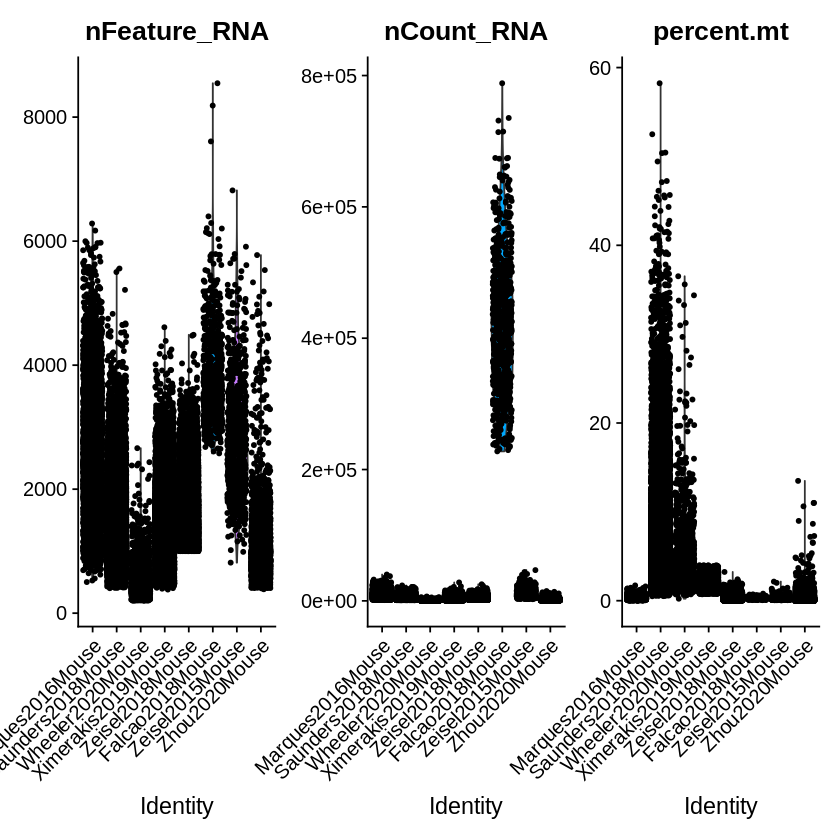

In [101]:
# Visualize QC metrics as a violin plot
Idents(Mouse)<-"Study"
VlnPlot(Mouse, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [ ]:
#ORGANIZE Human merge object meta data

In [49]:
Human <-readRDS("/media/reuschenbach/Data/Masterthesis/Merged/HumanCtrl/2020_scRNA_HUMAN_HealthyOligo_StudyandCondition_SCT.rds")

In [50]:
Human <-(CreateSeuratObject(counts = Human@assays$RNA@counts ,meta.data = Human@meta.data))

In [54]:
colnames(Human@meta.data)'nCount_integrated' 'nFeature_integrated' 'nCount_SCT' 'nFeature_SCT

[1] "orig.ident"         "nCount_RNA"         "nFeature_RNA"      
 [4] "Age"                "Sex"                "percent.mt"        
 [7] "CellTypeOriginal"   "CellType"           "Patient_ID"        
[10] "Tissue"             "Study"              "Condition"         
[13] "Platform"           "CellTypeSubcluster" "Lesion"            
[16] "CauseOfDeath"       "Medication"         "DiseaseStage"      
[19] "Study_Condition"    "Species"

In [52]:
Human@meta.data$Species <- 'Human'

In [53]:
Human@meta.data$nCount_integrated <-NULL
Human@meta.data$nFeature_integrated <-NULL
Human@meta.data$nCount_SCT <- NULL
Human@meta.data$nFeature_SCT <- NULL

In [55]:
Human$AGE<-Human$Age
Human$STUDY<-Human$Study
Human$New<-paste(Human$AGE, Human$STUDY)

In [56]:
Human$New <- factor(Human$New, levels = c('49 years Lake2018', '48 years Lake2018', '35 years Lake2018',
                                      '90+years Mathys2019', '82years Mathys2019', '88years Mathys2019',
                                        '79years Mathys2019', '89years Mathys2019', '84years Mathys2019',
                                        '87years Mathys2019', '80years Mathys2019', '85years Mathys2019',
                                        '77years Mathys2019', '81years Mathys2019', '86years Mathys2019',
                                        '83years Mathys2019', 'NA Zhou2020', '40-65years Habib2017', 'NA Grubman2019',
                                        '58.0 ± 17.5 years Jaekel2019', '52 Wheeler2019', '45 Wheeler2019',
                                        '58 Wheeler2019', '62 Wheeler2019' )
                            , labels =  c('49years', '48years', '35years','90+years', '82years', '88years ', '79years', '89years', '84years', '87years',
                                     '80years ', '85years', '77years', '81years', '86years', '83years', 'NAZhou', 
                                     '40-65years', '67.3–91 years', '58.0± 17.5years', '52years', '45years', "58years", 
                                     '62years'))

In [57]:
Human$Age<-NULL
Human$Age <-Human$New
Human$New<-NULL
Human$AGE<-NULL
Human$STUDY<-NULL

In [58]:
colnames(Human@meta.data)

[1] "orig.ident"         "nCount_RNA"         "nFeature_RNA"      
 [4] "Sex"                "percent.mt"         "CellTypeOriginal"  
 [7] "CellType"           "Patient_ID"         "Tissue"            
[10] "Study"              "Condition"          "Platform"          
[13] "CellTypeSubcluster" "Lesion"             "CauseOfDeath"      
[16] "Medication"         "DiseaseStage"       "Study_Condition"   
[19] "Species"            "Age"

In [59]:
str(Human)

Formal class 'Seurat' [package "Seurat"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:47436660] 12 58 118 384 756 1887 2681 2802 2831 2842 ...
  .. .. .. .. .. ..@ p       : int [1:55243] 0 1057 1635 2125 2760 3203 3748 4385 4809 5153 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 71921 55242
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:71921] "A1BG" "A1BG-AS1" "A1CF" "A2M" ...
  .. .. .. .. .. .. ..$ : chr [1:55242] "Lake2018_Oli_cbm1_CTCTCTCGTCAA" "Lake2018_Oli_cbm1_TGGCTGCCTGGA" "Lake2018_Oli_cbm1_GTTTAATCCTGA" "Lake2018_Oli_cbm1_AAAGTAGAGCAG" ...
  .. .. .. .. .. ..@ x       : num [1:47436660] 2 1 1 1 1 1 1 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : in

In [61]:
saveRDS(Human, "/media/reuschenbach/Data/Masterthesis/Merged/HumanCtrl/2020_scRNA_HUMAN_HealthyOligo_StudyandCondition_SCT_CountsMetaDataOnly.rds")